# SPLAY TREE

In [12]:
class SplayNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class SplayTree:
    def __init__(self):
        self.root = None
    #AJOUT
    def insert_list(self, key_list):
        for key in key_list:
            self.insert(key)

    def insert(self, key):
        self.root = self._insert(self.root, key)

    def _insert(self, node, key):
        if node is None:
            return SplayNode(key)
        elif key == node.key:
            return node
        elif key < node.key:
            node.left = self._insert(node.left, key)
        else:
            node.right = self._insert(node.right, key)
        
        return self._splay(node, key)
    #SUPPRESSION
    def delete(self, key):
        self.root = self._delete(self.root, key)
        
    def _delete(self, node, key):
        if node is None:
            return node
        elif key < node.key:
            node.left = self._delete(node.left, key)
        elif key > node.key:
            node.right = self._delete(node.right, key)
        else:
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            
            min_node = self._get_min_node(node.right)
            node.key = min_node.key
            node.right = self._delete(node.right, min_node.key)
        
        return node
    #RECHERCHE
    def search(self, key):
        self.root = self._search(self.root, key)
        return self.root is not None and self.root.key == key

    def _search(self, node, key):
        if node is None or node.key == key:
            return node
        elif key < node.key:
            if node.left is None:
                return node
            if key < node.left.key:
                node.left.left = self._search(node.left.left, key)
                node = self._rotate_right(node)
            elif key > node.left.key:
                node.left.right = self._search(node.left.right, key)
                if node.left.right is not None:
                    node.left = self._rotate_left(node.left)
            if node.left is not None:
                return self._rotate_right(node)
            else:
                return node
        else:
            if node.right is None:
                return node
            if key < node.right.key:
                node.right.left = self._search(node.right.left, key)
                if node.right.left is not None:
                    node.right = self._rotate_right(node.right)
            elif key > node.right.key:
                node.right.right = self._search(node.right.right, key)
                node = self._rotate_left(node)
            if node.right is not None:
                return self._rotate_left(node)
            else:
                return node
            
    #FONCTIONS UTILES / PRIMITIVES
    def _splay(self, node, key):
        if node is None or node.key == key:
            return node
        elif key < node.key:
            if node.left is None:
                return node
            if key < node.left.key:
                node.left.left = self._splay(node.left.left, key)
                node = self._rotate_right(node)
            elif key > node.left.key:
                node.left.right = self._splay(node.left.right, key)
                if node.left.right is not None:
                    node.left = self._rotate_left(node.left)
            if node.left is not None:
                return self._rotate_right(node)
            else:
                return node
        else:
            if node.right is None:
                return node
            if key < node.right.key:
                node.right.left = self._splay(node.right.left, key)
                if node.right.left is not None:
                    node.right = self._rotate_right(node.right)
            elif key > node.right.key:
                node.right.right = self._splay(node.right.right, key)
                node = self._rotate_left(node)
            if node.right is not None:
                return self._rotate_left(node)
            else:
                return node

    def _rotate_left(self, node):
        y = node.right
        node.right = y.left
        y.left = node
        return y

    def _rotate_right(self, node):
        x = node.left
        node.left = x.right
        x.right = node
        return x

    def _get_min_node(self, node):
        if node is None or node.left is None:
            return node
        return self._get_min_node(node.left)

## Tests

In [13]:
import graphvizDrawTree as viz

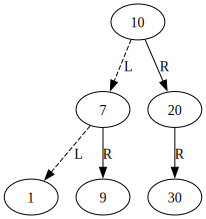

In [14]:
# Create an instance of SplayTree
splay_tree = SplayTree()

# Insert nodes into the Splay tree
splay_tree.insert(1)
splay_tree.insert(9)
splay_tree.insert(7)
splay_tree.insert(30)
splay_tree.insert(20)
splay_tree.insert(10)
dot = viz.draw_tree(splay_tree.root)
dot


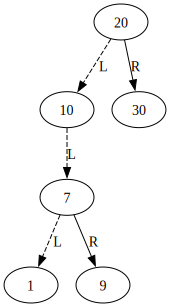

In [15]:
splay_tree.search(20)
dot = viz.draw_tree(splay_tree.root)
dot

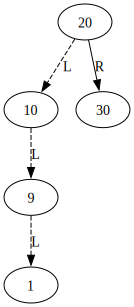

In [16]:
splay_tree.delete(7)
dot = viz.draw_tree(splay_tree.root)
dot

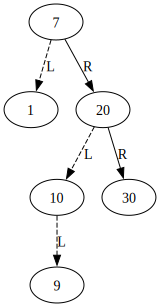

In [20]:
splay_tree.insert(7)
dot = viz.draw_tree(splay_tree.root)
dot